### REPORT
### TASK 1
#### Preprocessed
Using the word_lemmas function that breakdown as follows: (a) Replace the sub-string ‘not ’ with ‘not_’ so if there is a ‘not’ word in text data, it would not separate from the following word. It would change the meaning and context. Other than that, for the sake of consistency, I used .lower() to convert the original casing; (b)Removctuationun; removing all the non-letter (nonalphabetical) or whitespace characters because a lot of numeric characters contain text that would make our word vectors too large without add significant information; (b) Part of Speech Tagging and lemmatization using libraries from Natural Language Toolkit (NLTK) such as corpus, stem, and tokenize to filter word (pos_tags), convert word into their base or dictionary form with deleting suffixes (WordNetLmatizer, PorterStemmer) so my word vector become more meaningful and simple; (d) Joins the lemmatized (and optionally stemmed) tokens back into a single string, separated by whitespace. This string represents the processed text, ready for further vectorization.
After that, I transformed the text using CountVector() from sklearn into an n*m metrics representation. In this term, I am also saving the vectorizer to be used in transforming test data. So, both text data as independent variables in training and test  ata would be represented with the same size metrics.
To evaluate my pre-process flow in text data, I am plotting the most word frequencies each category. The result show there is no “no make sense”  or meaningless word for example 'food' in restaurant, “store” in Shopping and “bar” in Nightlife.
For the dependent variable, I am converting the category by mapping it into a numeric representation (0,1,2). But for predictive requirements, I saved it into function map_y so I can convert it back when I need it.
#### Model
The training a condition is on Unbalanced data per category (Restaurant is dominating the data). In this case I am using ComplementNB() to deal with it. It is an adaptation of the standard Multinomial Naive Bayes (MNB) classifier, with modifications aimed at improving performance on imbimplilearn, n.d.; Sklearn.Naive_bayes.ComplementNB, n.d.; Rennie et al., 2003). Based on Rennie et al., this algorithm has a mechanism to (a) Using complement class conditional Prob. ; (b) Weighting for Imbalanced Class. So, in some cases, it performs better on an imbalanced class than Multinomial Naïve Bayes on an imbalanced dataset.
#### Model Evaluation
I am using 10 percent of training data to conduct Cross-Validation the Naïve-Bayes estimation model and approximate the accuracy desired from unseen test data.
By only using ‘review’ feature that converted it into sparse matrix, ComplementNB have 86 percent accuracy and recall on validation set.
By using this model, then I predict unseen data with prediction score 0.895 or higher than it performed in validation set dat.
### TASK 2
##### Preprocesing 
I conduct the same pre-processing text for both [‘review’] and [‘name’]. Both are inputted as text data, and the same logic can be imT word representation. And the ‘name’ feature is pre-processed and then converted into a 2838x2696 sparse matrix. The smaller number because ‘review’ .in lon er ext than ‘name’.
#### Pre-process Numeric Data
##### Mean Checkin time (MCT)
I have an issue with ‘Mean_checkin_time’ from the plot explicitly show multimodal dist. On the other hand, gaussian distrution is a strict that would affect much to the model. So, I discritize the MCT with binning it with 3 bins( encode, strategy parameter  “onehot-dense”, and “uniform”) so it resulting a dense array with all bins having identical width because I have no proper auxallary information to split that distribution. I am just looking at the best split is 3 bins because when splited into more then 3 bins, there is no values on 4th , 5th , bins.
#### Langitude and Longitude
Based on boxplot, we know that these two feature have so much outliers. To reduce the impact, I am trying to normalize the data using MinMax rather than Z-Score. But even after MinMax normalization, Boxplot shows the and Sahiwo-wilk test shows that even after normalization, the data is not following Gaussian distribution.
### Model
As we still used the same data with task I, which contains an unbalanced category class, so for the estimation, I am also using ComplementNB() implementation, which is better at handling that.
##### Model Evaluation
I am using 10 percent of training data to conduct a Cross-Validation of the Naïve-Bayes estimation model and approximate the accuracy desired from unseen test data. For this model, I get 0.89 percent in accuracy and recall but a 0.92 prediction score on unseen test data.
From my prspective the most important thing in my model is how the preprocess the data especially the test data, I tried several times until I formulated that preprocessing function, because tuning then NB parameter such alpha in my NB model is increase my validation accuracy but decreasen score on unseen test data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

training = pd.read_csv("/Users/mac/Downloads/train.csv")
test = pd.read_csv("/Users/mac/Downloads/test.csv")

# Convert category in Y into numerical form
map_y = {'Restaurants': 0, 'Shopping': 1, 'Nightlife':2}
training['category'] = training['category'].map(map_y)
y = training['category']

lemma = WordNetLemmatizer()
stem = PorterStemmer()

# POS tag
def get_pos(w):
    if w.startswith('J'):
        return 'a'
    elif w.startswith('N'):
        return 'n'
    elif w.startswith('V'):
        return 'v'
    elif w.startswith('R'):
        return 'r'
    else:
        return 'n'

# Text preprocess
def word_lemmas(a):
    a = a.replace("not", "not_")
    a = a.lower()
    punc = r'[^a-zA-Z\s]'
    a = re.sub(punc, '', a)
    stop_words = set(stopwords.words('english'))
    w_tokens = word_tokenize(a)
    filter_tokens = [w for w in w_tokens if w not in stop_words]
    pos_tags = nltk.pos_tag(filter_tokens)
    lemmas = [lemma.lemmatize(w, pos=get_pos(tag)) for w, tag in pos_tags]
    lemmas = [stem.stem(w) for w in lemmas]
    return ' '.join(lemmas)
    
# Text Vectorizer
def bow(b):
    v = CountVectorizer(stop_words='english')
    review_count = v.fit_transform(b)
    return review_count, v
    

### TASK 1

Predict category using only 'review' attribute

In [2]:
X = training[['review']]

training['review'].groupby(y).describe()

training['review'] = training['review'].apply(word_lemmas)
test['review'] = test['review'].apply(word_lemmas)

X_train_review, v_train_review = bow(training['review'])
X_test_review = v_train_review.transform(test['review'])

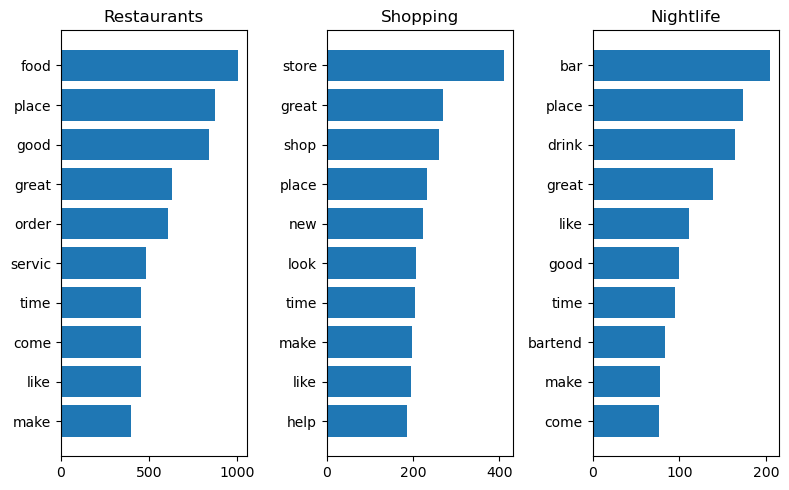

In [3]:
# Fuction to plot the word after pre-processing data for each category Y
def plot_w_freq(X, y, map_y, v):
    w_by_class = {}
    for cat, num in map_y.items():
        i = (y == num)
        words = np.array(X[i].sum(axis=0)).flatten()
        w_freq = [(w, freq) for w, freq in zip(v.get_feature_names_out(), words)]
        w_freq = sorted(w_freq, key=lambda x: x[1], reverse=True)[:10]
        w_by_class[cat] = w_freq
    
    fig, axes = plot.subplots(1, len(map_y), figsize=(8, 5))
    for i, (cat, w_freq) in enumerate(w_by_class.items()):
        words, freq = zip(*w_freq)
        axes[i].barh(words, freq)
        axes[i].set_title(cat)
        axes[i].invert_yaxis()
    plot.tight_layout()
    plot.show()

# Splittting training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_review, y, test_size=0.1, random_state=0)

# Plot word in metrics after preprocess word 'review'
plot_w_freq(X_train, y_train, map_y, v_train_review)

In [4]:
# Estimate the model and make prediction on Validation 
model_t1 = ComplementNB()
model_t1.fit(X_train, y_train)    
y_pred = model_t1.predict(X_val)

# Evaluation set
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8661971830985915
Precision: 0.8566234842208329
Recall: 0.8661971830985915
F1 Score: 0.8567033442410635
Confusion Matrix:
[[167   6   6]
 [  4  64   1]
 [ 16   5  15]]


In [5]:
# Convert 'review' attribute on test data with the same vector used in training data
X_test = v_train_review.transform(test['review'])

# Predict on the test data
y_cap = model_t1.predict(X_test)

# Re-convert the numeric label into categoric class
label_mapping = {0: 'Restaurants', 1: 'Shopping', 2: 'Nightlife'}
test['category'] = [label_mapping[label] for label in y_cap]
id, cat = test['ID'], test['category']

# save into file
result = pd.DataFrame({'ID': id, 'category': cat})
result.to_csv('1stModel.csv', index=False)

## TASK 2

Use another attribute to elevate the prediction accuracy.


/Users/mac/anaconda3/envs/ML-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


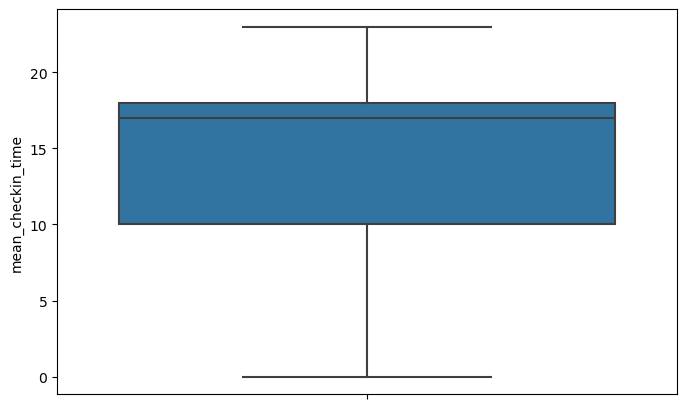

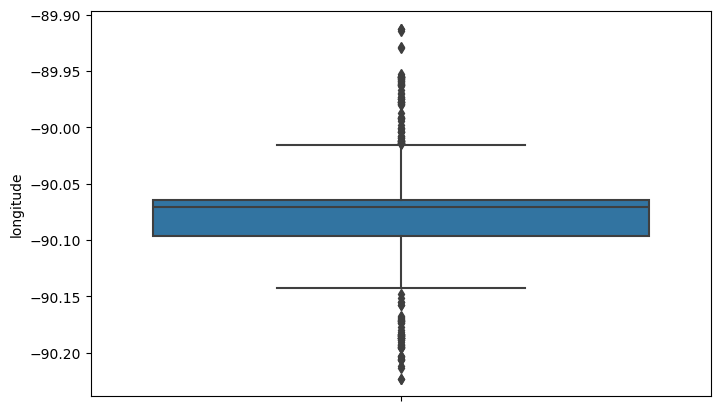

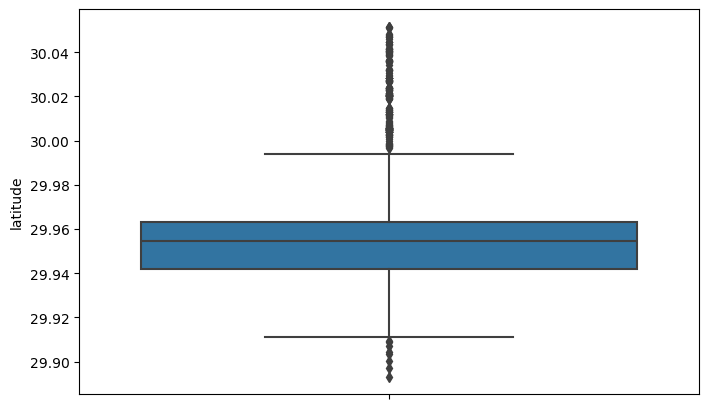

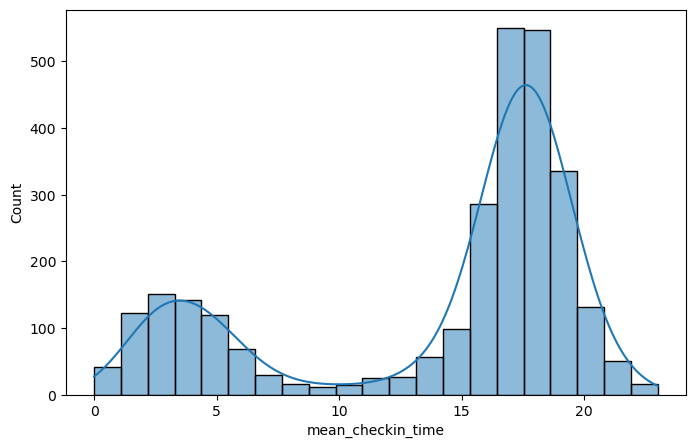

/Users/mac/anaconda3/envs/ML-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


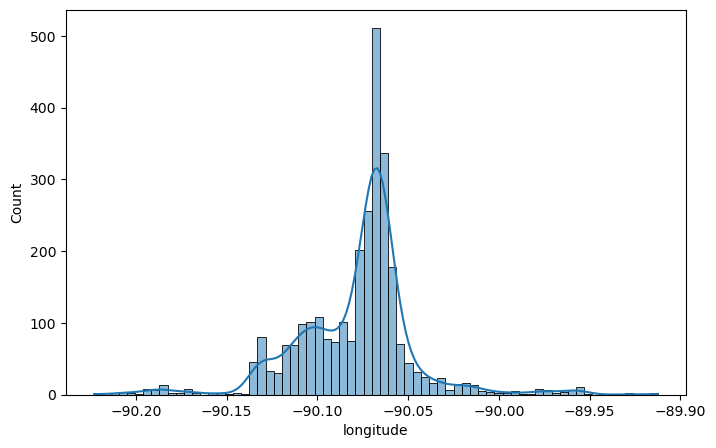

/Users/mac/anaconda3/envs/ML-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


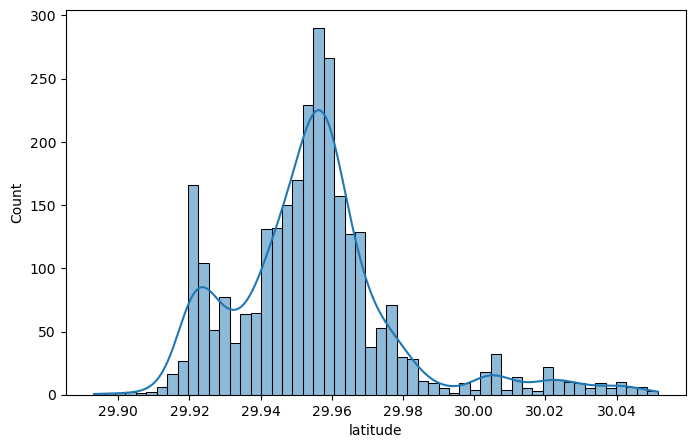

In [6]:
# Explore other candidate for independent variable with numerical data by plotting them 
# Box plot
plot.figure(figsize=(8,5))
sns.boxplot(data=training,y=training['mean_checkin_time'])

plot.figure(figsize=(8,5))
sns.boxplot(data=training,y=training['longitude'])

plot.figure(figsize=(8,5))
sns.boxplot(data=training,y=training['latitude'])

# Histogram
plot.figure(figsize=(8, 5))
sns.histplot(data=training,x=training['mean_checkin_time'], kde=True)
plot.show()

plot.figure(figsize=(8, 5))
sns.histplot(data=training,x=training['longitude'], kde=True)
plot.show()

plot.figure(figsize=(8, 5))
sns.histplot(data=training,x=training['latitude'], kde=True)
plot.show()


In [7]:
# Normalize the 'langitude' and 'longitude' with MinMax
scale = MinMaxScaler()
training['long_minmax'] = scale.fit_transform(training['longitude'].values.reshape(-1, 1))
training['lat_minmax'] = scale.fit_transform(training['latitude'].values.reshape(-1, 1))
test['long_minmax'] = scale.fit_transform(test['longitude'].values.reshape(-1, 1))
test['lat_minmax'] = scale.fit_transform(test['latitude'].values.reshape(-1, 1))

# Dicritize 'mean checking time' with binning it into 3
MCT_training = np.array(training['mean_checkin_time']).reshape(-1, 1)
MCT_test = np.array(test['mean_checkin_time']).reshape(-1, 1)
discritize = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
X_train_MCT_bin = pd.DataFrame(discritize.fit_transform(MCT_training), columns=['bin1', 'bin2', 'bin3'])
X_test_MCT_bin = pd.DataFrame(discritize.fit_transform(MCT_test), columns=['bin1', 'bin2', 'bin3'])

# Pre-process 'name' with same pattern as 'review'
training['name'] = training['name'].apply(word_lemmas)
test['name'] = test['name'].apply(word_lemmas)
X_train_name, v_train_name = bow(training['name'])
X_test_name = v_train_name.transform(test['name'])

X_train_review_T = pd.DataFrame(X_train_review.toarray(), columns=v_train_review.get_feature_names_out())
X_train_name_T = pd.DataFrame(X_train_name.toarray(), columns=v_train_name.get_feature_names_out())

X_test_review_T = pd.DataFrame(X_test_review.toarray(), columns=v_train_review.get_feature_names_out())
X_test_name_T = pd.DataFrame(X_test_name.toarray(), columns=v_train_name.get_feature_names_out())


<Axes: ylabel='lat_minmax'>

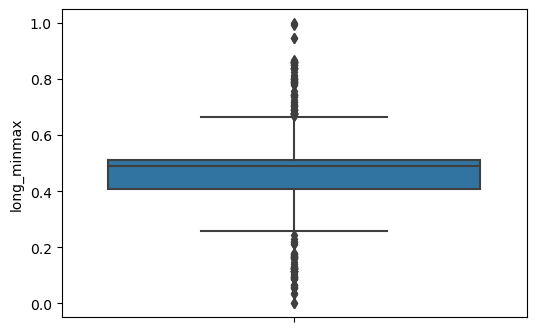

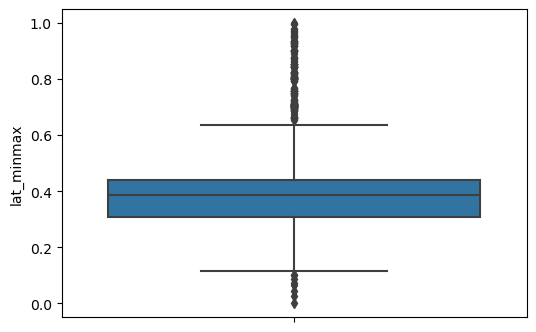

In [13]:
# Boxplot longiitude and latitude after normalization to check outliers
plot.figure(figsize=(6,4))
sns.boxplot(data=training,y=training['long_minmax'])

plot.figure(figsize=(6,4))
sns.boxplot(data=training,y=training['lat_minmax'])

In [8]:
# Shapiro-Wilk statistical test
stat, p = stats.shapiro(training['long_minmax'])
print('Statistics Longitude, p-value = %.3f' % (p))

alpha = 0.05
if p > alpha:
    print('There is no sufficient prove to claim that data distribution not Gaussian (Not reject H0)')
else:
    print('There is sufficient prove to claim that data distribution not Gaussian (reject H0)')


stat, p = stats.shapiro(training['lat_minmax'])
print('Statistics latitude, p-value = %.3f' % (p))

alpha = 0.05
if p > alpha:
    print('There is no sufficient prove to claim that data distribution not Gaussian (Not reject H0)')
else:
    print('There is sufficient prove to claim that data distribution not Gaussian (reject H0)')

Statistics Longitude, p-value = 0.000
There is sufficient prove to claim that data distribution not Gaussian (reject H0)
Statistics latitude, p-value = 0.000
There is sufficient prove to claim that data distribution not Gaussian (reject H0)


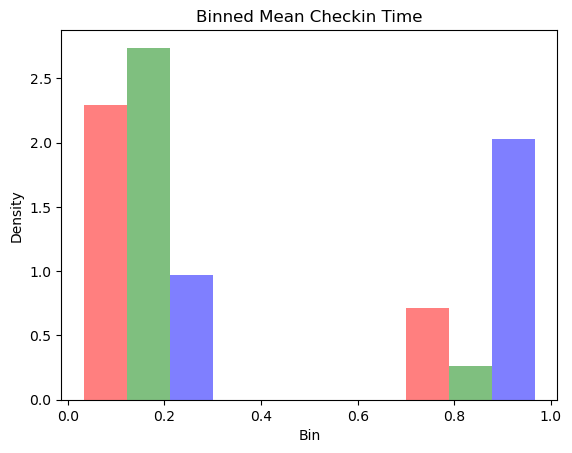

In [15]:
# Plot the 'mean checki time' to see distribution after binning
colors = ['red', 'green', 'blue']
plot.hist(X_train_MCT_bin, bins=3, density=True, alpha=0.5, color=colors)
plot.title('Binned Mean Checkin Time')
plot.xlabel('Bin')
plot.ylabel('Density')
plot.show()

In [9]:
# Embed features as independent variable
X_train_embed = pd.concat([X_train_name_T, X_train_review_T, X_train_MCT_bin],axis=1)
X_test_embed = pd.concat([X_test_name_T, X_test_review_T, X_test_MCT_bin], axis=1)

model_t2 = ComplementNB()

X_trainembed, X_val, y_trainembed, y_val = train_test_split(X_train_embed, y, test_size=0.1, random_state=0)

model_t2.fit(X_trainembed, y_trainembed)

y_predembed = model_t2.predict(X_val)

# Model Evaluation
acc = accuracy_score(y_val, y_predembed)
prec = precision_score(y_val, y_predembed, average='weighted')
recall = recall_score(y_val, y_predembed, average='weighted')
f1 = f1_score(y_val, y_predembed, average='weighted')
conf_matrix = confusion_matrix(y_val, y_predembed)
param = model_t2.get_params([])

# Print Model Evaluation
print("Parameter:", param)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Parameter: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}
Accuracy: 0.8908450704225352
Precision: 0.8835593175697476
Recall: 0.8908450704225352
F1 Score: 0.8828714392227524
Confusion Matrix:
[[170   4   5]
 [  2  66   1]
 [ 14   5  17]]


In [11]:
y_cap_t2 = model_t2.predict(X_test_embed)

label_mapping = {0: 'Restaurants', 1: 'Shopping', 2: 'Nightlife'}
test['category'] = [label_mapping[label] for label in y_cap_t2]
id, cat = test['ID'], test['category']

result = pd.DataFrame({'ID': id, 'category': cat})

result.to_csv('9thModel.csv', index=False)

## References
Dangi, A., & Srivastava, S. (2014). Educational data classification using selective Naïve Bayes for quota categorization. 2014 IEEE International Conference on MOOC, Innovation and Technology in Education (MITE), 118–121. https://doi.org/10.1109/MITE.2014.7020253
Hassani, A., Iranmanesh, A., & Mansouri, N. (2021). Text mining using nonnegative matrix factorization and latent semantic analysis. Neural Computing and Applications, 33(20), 13745–13766. https://doi.org/10.1007/s00521-021-06014-6
Indurkhya, N., & Damerau, F. J. (1999). Handbook of Natural Language Processing. CRC Press LLC. http://ebookcentral.proquest.com/lib/auckland/detail.action?docID=565922
Kumar Bhowmik, T. (2015). Naive Bayes vs Logistic Regression: Theory, Implementation and Experimental Validation. Inteligencia Artificial, 18(56), 14–30. https://doi.org/10.4114/intartif.vol18iss56pp14-30
Naïve Bayes Algorithm: Everything You Need to Know—KDnuggets. (n.d.). Retrieved May 12, 2024, from https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html
Naive Bayes Classifier | Simplilearn. (n.d.). Simplilearn.Com. Retrieved May 12, 2024, from https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier
Naive Bayes questions: Continus data, negative data, and MultinomialNB in scikit-learn—Cross Validated. (n.d.). Retrieved May 12, 2024, from https://stats.stackexchange.com/questions/169400/naive-bayes-questions-continus-data-negative-data-and-multinomialnb-in-scikit
Rennie, J. D. M., Shih, L., Teevan, J., & Karger, D. R. (2003). Tackling the Poor Assumptions of Naive Bayes Text Classiﬁers.
Sklearn.naive_bayes.ComplementNB. (n.d.). Scikit-Learn. Retrieved May 12, 2024, from https://scikit-learn/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html
sklearn.preprocessing.KBinsDiscretizer—Scikit-learn 1.4.2 documentation. (n.d.). Retrieved May 12, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
